# Decision Trees for Iris dataset

This is the "Iris" dataset. Originally published at UCI Machine Learning Repository: Iris Data Set, this small dataset from 1936 is often used for testing out machine learning algorithms and visualizations (for example, Scatter Plot). Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
data = pd.read_csv("iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

### Data cleaning

In [5]:
def data_cleaning(data):
  unique_values = []
  na_values = []
  null_values = []
  columns = []

  for column in data.columns.values:
    unique_values.append(len(np.unique(data[column])))
    na_values.append(list(data[column].isna()).count(True))
    null_values.append(list(data[column].isnull()).count(True))
    columns.append(column)

  data_validated = pd.DataFrame(index=columns) 
  data_validated["unique_values"] = list(unique_values)
  data_validated["na_values"] = list(na_values)
  data_validated["null_values"] = list(null_values)
  return data_validated

In [6]:
data_cleaning(data)

,unique_values,na_values,null_values
Sepal.Length,35,0,0
Sepal.Width,23,0,0
Petal.Length,43,0,0
Petal.Width,22,0,0
Species,3,0,0


In [10]:
for column in data.columns.values:
  print(column,": ",np.unique(data[column]))

Sepal.Length :  [4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]
Sepal.Width :  [2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]
Petal.Length :  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]
Petal.Width :  [0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]
Species :  ['setosa' 'versicolor' 'virginica']


### Preparing dataset for machine learning model

In [11]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [12]:
data[predictors].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
pd.DataFrame(data[target]).head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data[predictors],data[target], test_size=0.33, random_state=42)

In [15]:
pd.DataFrame(y_test).head()

,Species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Decision Tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier(criterion = "entropy",min_samples_split=2,random_state=99)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [37]:
preds = tree.predict(X_test)
pd.crosstab(preds,y_test, rownames=["Predicciones"],colnames=["Reales"])

Reales,setosa,versicolor,virginica
Predicciones,,,
setosa,19,0,0
versicolor,0,15,1
virginica,0,0,15


### Visualization 

In [19]:
from sklearn.tree import export_graphviz

A .dot file is created for saving tree format so then it could be visualized

In [38]:
with open("iris_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [39]:
import os
from graphviz import Source

In [40]:
file = open("iris_dtree.dot","r")
text = file.read()
text


'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 100\\nvalue = [31, 35, 34]"] ;\n1 [label="entropy = 0.0\\nsamples = 31\\nvalue = [31, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 69\\nvalue = [0, 35, 34]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.35\\nentropy = 0.485\\nsamples = 38\\nvalue = [0, 34, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.45\\nentropy = 0.31\\nsamples = 36\\nvalue = [0, 34, 2]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 26\\nvalue = [0, 26, 0]"] ;\n4 -> 5 ;\n6 [label="Sepal.Width <= 2.6\\nentropy = 0.722\\nsamples = 10\\nvalue = [0, 8, 2]"] ;\n4 -> 6 ;\n7 [label="Sepal.Length <= 6.15\\nentropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.0\\nsamples = 1\\nvalue = 

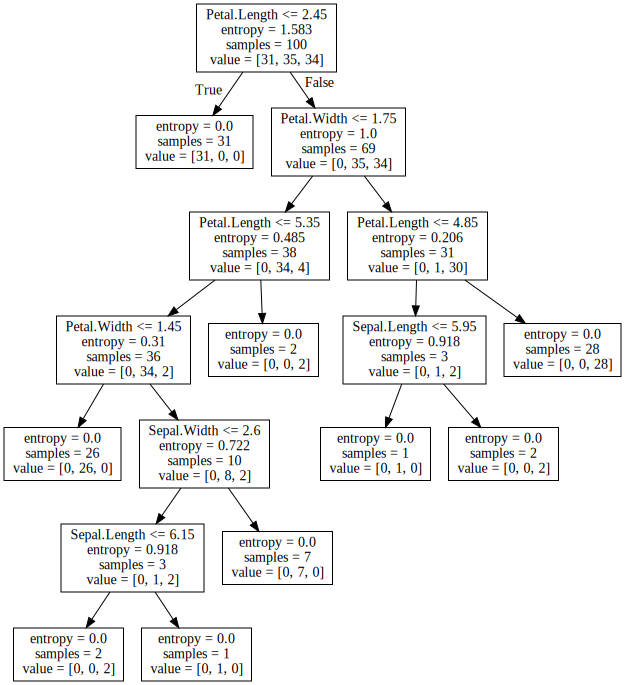

In [41]:
Source(text)

### Pruning the tree

In [42]:
X = data[predictors]
Y = data[target]
tree = DecisionTreeClassifier(criterion = "entropy",max_depth= 5, min_samples_split=20,random_state=99)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [43]:
with open("iris_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [44]:
file = open("iris_dtree.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 100\\nvalue = [31, 35, 34]"] ;\n1 [label="entropy = 0.0\\nsamples = 31\\nvalue = [31, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 69\\nvalue = [0, 35, 34]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.35\\nentropy = 0.485\\nsamples = 38\\nvalue = [0, 34, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.45\\nentropy = 0.31\\nsamples = 36\\nvalue = [0, 34, 2]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 26\\nvalue = [0, 26, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.722\\nsamples = 10\\nvalue = [0, 8, 2]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.206\\nsamples = 31\\nvalue = [0, 1, 30]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8 

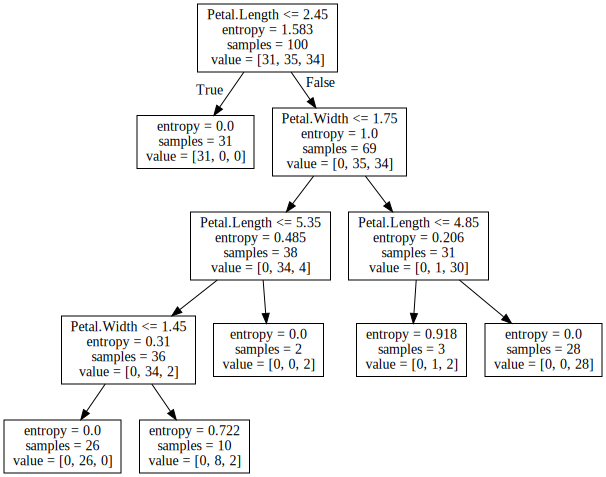

In [45]:
Source(text)

[Text(148.8, 199.32, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(111.60000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(186.0, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(111.60000000000001, 126.83999999999999, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(74.4, 90.6, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(37.2, 54.359999999999985, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(111.60000000000001, 54.359999999999985, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(74.4, 18.119999999999976, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(148.8, 18.119999999999976, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(148.8, 90.6, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(260.40000000000003, 126.83999999999999, 'X[2] <= 4.85\nentropy = 0.206\ns

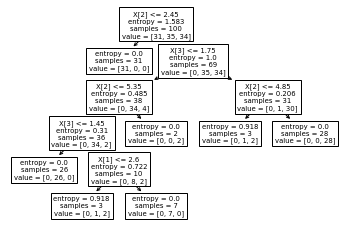

In [105]:
from sklearn.tree import plot_tree
plot_tree(tree)

In [47]:
from sklearn.model_selection import KFold

In [49]:
cv = KFold(n_splits=10, shuffle = True, random_state=1)

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))

In [53]:
score

0.9333333333333333

Let's see how cross_val_score is affected when increasing max_depth parameter

In [55]:
for i in range(1,10):
    tree = DecisionTreeClassifier(criterion = "entropy",max_depth= i, 
                                  min_samples_split=5,random_state=99)
    tree.fit(X_train,y_train)
    cv = KFold(n_splits=10, shuffle = True, random_state=1)
    score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", 
                                    cv = cv, n_jobs=1))
    print("max_depth = ",i,"cross_val_score: ",score)

max_depth =  1 cross_val_score:  0.5666666666666667
max_depth =  2 cross_val_score:  0.9200000000000002
max_depth =  3 cross_val_score:  0.9400000000000001
max_depth =  4 cross_val_score:  0.9333333333333333
max_depth =  5 cross_val_score:  0.9333333333333333
max_depth =  6 cross_val_score:  0.9333333333333333
max_depth =  7 cross_val_score:  0.9333333333333333
max_depth =  8 cross_val_score:  0.9333333333333333
max_depth =  9 cross_val_score:  0.9333333333333333


max_depth = 3 gives the highest score. Also, when max_depth is greater than 3 cross_val_score decreases. It means that overfitting efect appears for these max_depth levels.

### Random forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# n_estimators means the number of trees in forest
n_estimator = [5,9,14,18,22]

for n_est in n_estimator:
  forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=n_est)
  forest.fit(X,Y)
  print("n_estimator",": ",n_est,": ",forest.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimator :  5 :  0.8933333333333333
n_estimator :  9 :  0.9466666666666667
n_estimator :  14 :  0.9466666666666667
n_estimator :  18 :  0.9533333333333334
n_estimator :  22 :  0.9466666666666667


In [93]:
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=18)
forest.fit(X,Y)
print(forest.oob_score_)

0.9533333333333334


### Conclusion

For iris dataset, the following results were reached:
* Decision Tree technic with max_deph = 3 has a score = 94%
* Random Forest technic with 18 trees has a score = 95.3%